In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("data/Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [12]:
X=df.drop(columns=['Salary'])
y=df['Salary']

In [15]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression
# cross validation
from sklearn.model_selection import cross_val_score
regression= LinearRegression()
regression.fit(X_train, y_train)
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [18]:
np.mean(mse)

-37049138.278826065

In [19]:
# prediction test data
reg_pred = regression.predict(X_test)
reg_pred

array([101985.83313774,  55063.44706951,  88372.5912453 ,  58220.47178118,
        40364.26434412,  45592.3729345 , 109647.00588449,  93600.69983569,
        46678.31376746])

In [21]:
accuracy = 1-error
accuracy

0.7322373549099588

In [34]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import math
mse=mean_absolute_percentage_error(reg_pred,y_test)
mae= mean_absolute_error(reg_pred,y_test)
rmse =math.sqrt(mse)
r2= r2_score(reg_pred,y_test)
n = X.shape[0]
k= X.shape[1]
adj_r2= 1- (((1-r2)*(n-1)) /(n-1-k))


In [35]:
print('MSE: ',mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2 Score: ', r2)
print('Adjusted R2 Score: ', adj_r2)

MSE:  0.2677626450900412
RMSE:  0.5174578679371309
MAE:  16485.555555555562
R2 Score:  0.525868623717988
Adjusted R2 Score:  0.4907477810304316


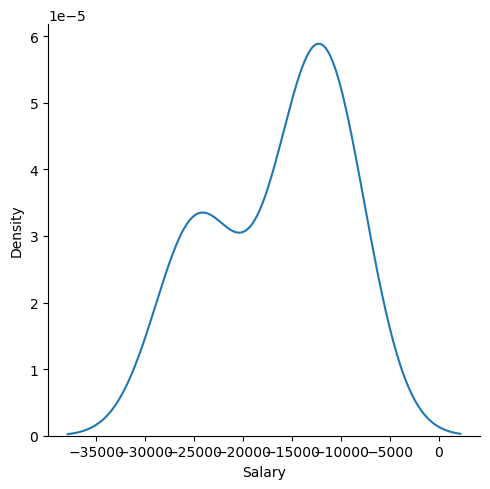

In [23]:
import seaborn as sns
sns.displot(reg_pred-y_test, kind='kde')

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'YearsExperience'}>],
       [<Axes: title={'center': 'Salary'}>, <Axes: >]], dtype=object)

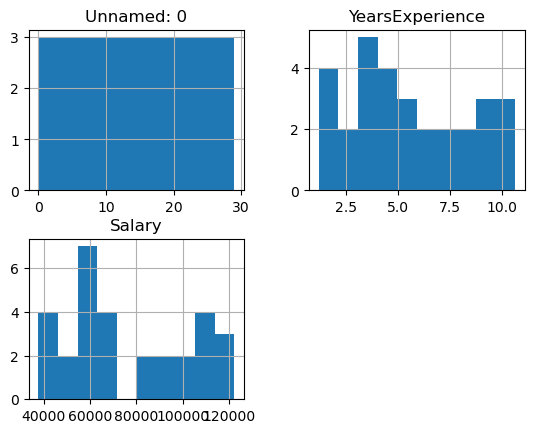

In [25]:
df.hist()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

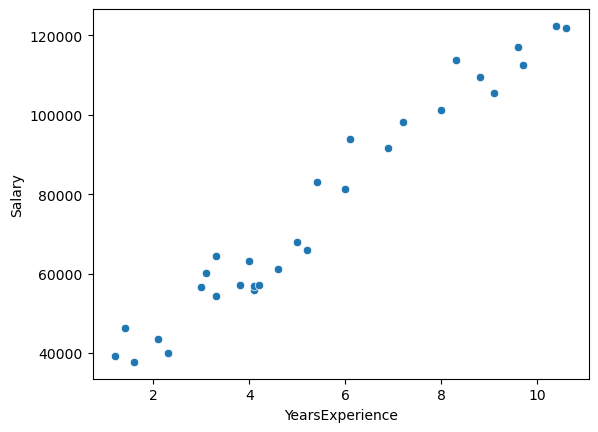

In [24]:
 # Scatter Plot
sns.scatterplot(x= 'YearsExperience', y= 'Salary', data = df)

In [26]:
df.corr()

,Unnamed: 0,YearsExperience,Salary
Unnamed: 0,1.000000,0.986460,0.960826
YearsExperience,0.986460,1.000000,0.978242
Salary,0.960826,0.978242,1.000000


In [22]:
from sklearn.metrics import r2_score
score = r2_score(reg_pred, y_test)
score

0.525868623717988